**Indiquer dans la boîte ci-dessous vos noms et prénoms**

Skander SERSI

# Analyse de données - Parier sur le meilleur

## Partie 1 - Description du problème

On se demande si le fait de parier sur un résultat d'un matche en choisissant l'option avec la cote la plus basse fait de nous forcement un gagnant ou pas.

Exemple: Match : OM - PSG | Victoire de l'OM = 3.1 | Victoire du PSG = 1.01 | Matche nul : 2.4


Dans notre cas nous allons choisir la victoire du PSG  puisque cette option admet la cote la plus basse

## Partie 2 - Modèle

La base des matches de premier league durant la saison 2015.

## Partie 3 - Code

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

In [3]:
data_Matche = pd.read_csv("projet/match.csv")
data_Player = pd.read_csv("projet/playerattributes.csv")
#data_Matche[['home_player_1','home_player_2','home_player_10','home_player_11']]
dm = data_Matche.dropna(subset =['B365H','B365D','B365A','home_player_1','home_player_2','home_player_3','home_player_4','home_player_5','home_player_6','home_player_7','home_player_8','home_player_9','home_player_10','home_player_11','away_player_1','away_player_2','away_player_3','away_player_4','away_player_5','away_player_6','away_player_7','away_player_8','away_player_9','away_player_10','away_player_11','away_team_goal','home_team_goal'])
dm.head(-1)

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
145,146,1,1,2008/2009,24,2009-02-27 00:00:00,493017,8203,9987,2,...,2.30,2.65,3.25,2.35,2.90,3.25,2.30,2.80,3.20,2.25
153,154,1,1,2008/2009,25,2009-03-08 00:00:00,493025,9984,8342,1,...,2.25,2.65,3.20,2.35,2.90,3.20,2.30,2.62,3.20,2.38
155,156,1,1,2008/2009,25,2009-03-07 00:00:00,493027,8635,10000,2,...,8.50,1.30,4.35,8.00,1.35,4.33,8.50,1.36,4.20,7.00
162,163,1,1,2008/2009,26,2009-03-13 00:00:00,493034,8203,8635,2,...,1.73,4.35,3.30,1.75,4.50,3.40,1.75,4.20,3.30,1.75
168,169,1,1,2008/2009,26,2009-03-14 00:00:00,493040,10000,9999,0,...,5.00,1.65,3.50,4.50,1.65,3.50,5.00,1.70,3.40,4.33
173,174,1,1,2008/2009,27,2009-03-22 00:00:00,493045,9991,10000,1,...,4.75,1.60,3.40,5.00,1.65,3.40,5.00,1.62,3.50,5.00
176,177,1,1,2008/2009,27,2009-03-21 00:00:00,493048,9999,8203,1,...,2.75,2.25,3.25,2.80,2.10,3.25,3.15,2.25,3.20,2.75
189,190,1,1,2008/2009,29,2009-04-12 00:00:00,493061,8635,8342,1,...,4.75,1.65,3.40,5.00,1.70,3.40,4.50,1.73,3.40,4.20
190,191,1,1,2008/2009,29,2009-04-10 00:00:00,493062,9999,9987,1,...,2.15,2.80,3.25,2.25,3.20,3.20,2.10,2.80,3.20,2.25
219,220,1,1,2008/2009,31,2009-04-26 00:00:00,493082,9999,9991,1,...,2.20,3.20,3.20,2.10,3.00,3.25,2.15,2.88,3.25,2.20


In [4]:
#### Definition de la fonction winner
# return 0 si équipe à domicile is winner
# return 1 si équipe visiteur is winner
# return 2 si draw
def winner(dataframe):
    if dataframe["home_team_goal"].values[0] > dataframe["away_team_goal"].values[0]:
        return 0
    if dataframe["home_team_goal"].values[0] < dataframe["away_team_goal"].values[0]:
        return 1
    else:
        return 2

In [5]:
#Definition fonction winner_cote: 
# return 0, si la cote de l'option que l'équipe à domicile gagne est la plus basse de toutes.
# return 1, si la cote de l'option que l'équipe visiteuse gagne est la plus basse de toutes.
# return 2, si la cote de l'option d'un matche nul entre les 2 équipes est la plus basse de toutes
def winner_cote(dataframe):
    if (dataframe["B365H"].values[0] < dataframe["B365A"].values[0]) and (dataframe["B365H"].values[0] < dataframe["B365D"].values[0]):
        return 0
    if (dataframe["B365D"].values[0] < dataframe["B365A"].values[0]) and (dataframe["B365D"].values[0] < dataframe["B365H"].values[0]):
        return 2
    else:
        return 1

## Partie 4 - Protocole expérimental

In [6]:
# On selectionne le dataframe des matches correspondants au championnat anglais durant la saison 2015/2016
dbwin = dm.loc[dm['league_id'] == 1729]
dbf = dbwin.loc[dbwin['season'] == '2015/2016']
#nombre de matches bien prédits
nmbp = 0
#nombre de matches mal prédits par les bookmakers
nmmp = 0
for i in dbf.index:
    if winner(dbf.loc[dbf.index == i]) == winner_cote(dbf.loc[dbf.index == i]):
        nmbp += 1
    else:
        nmmp += 1

## Partie 5 - Résultats

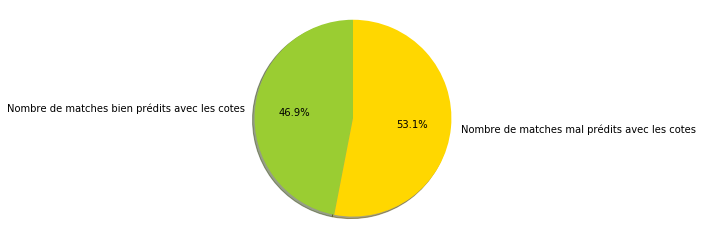

In [7]:
bets = [nmbp,nmmp]
bets
labels = ['Nombre de matches bien prédits avec les cotes','Nombre de matches mal prédits avec les cotes']
colors = ['yellowgreen', 'gold']

plt.pie(bets, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.axis('equal') 

#plt.savefig('PieChart02.png')
plt.show()

## Partie 6 - Analyse

On remarque qu'on a presque une chance sur deux de réussir à prédire un matche avec les cotes 